In [1]:
DEV = True

In [29]:
import os
import getpass
import numpy as np
import pandas as pd
from numpy.random import seed
seed(1)

project_path = 'C:/Users/' + getpass.getuser() + '/Desktop/10 - Thesis/cycle_prediction/'
project_exist = os.path.exists(project_path)
if project_exist and DEV:
    import sys
    sys.path.insert(0, project_path)
    print('development mode')
    np.set_printoptions(suppress=True)
    np.set_printoptions(linewidth=np.inf)
    pd.set_option('max_rows', 50)
else:
    print('user mode')
    
import cycle_prediction
print(cycle_prediction.__version__)
from cycle_prediction.t2e import t2e
from cycle_prediction.weibull_utils import plot_top_predictions

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pickle
import warnings
warnings.filterwarnings("ignore")
import os
%load_ext autoreload
%autoreload 2

development mode
1.2.0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
range_dict = {
    'e': range(2,22,2),
}

path = '../data/'

e = os.path.join(path,'bpic13_all.csv')
e = pd.read_csv(e)

df_name = {
    'e':'bpic13_all',
}

df_dict = {
    'e': e,
}

[]

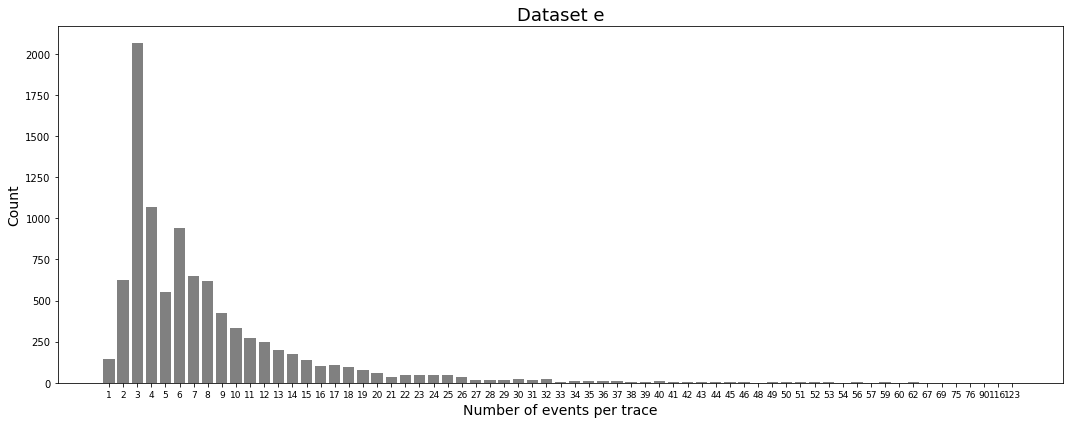

In [6]:
fig = plt.figure(figsize=(15, 6)) 

i = 0
for key, dataset in df_dict.items():
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'count'})["ActivityID"], color='gray')
    plt.xticks(rotation=0, fontsize=9)
    plt.xlabel("Number of events per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
plt.tight_layout()
plt.plot()

[]

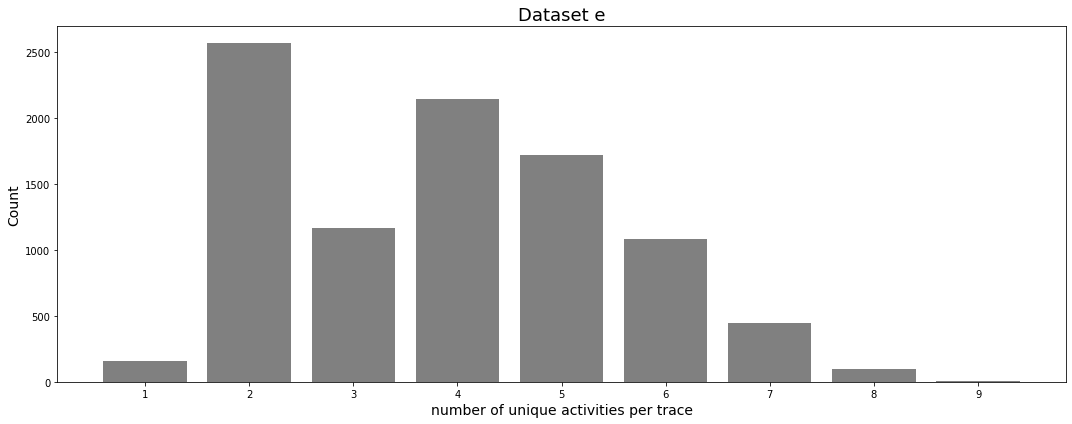

In [8]:
fig = plt.figure(figsize=(15, 6)) 
for key, dataset in df_dict.items():
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'nunique'})["ActivityID"], color='gray')
    plt.xlabel("number of unique activities per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
plt.tight_layout()
plt.plot()

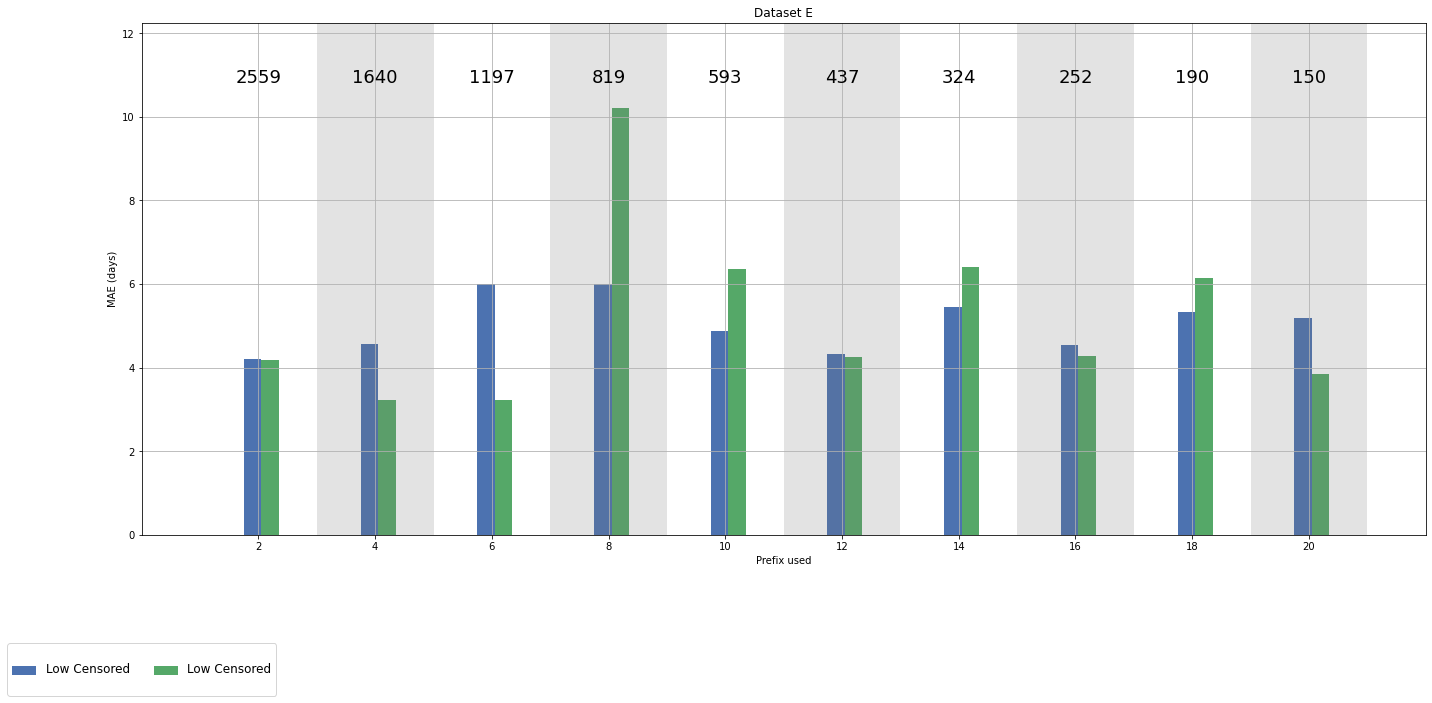

In [51]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[1,2])

dataset = 'e'
cases = []
labels= []

## Load baseline:
path_low = '../output/maes/low_censored/'
low_censored = list(np.squeeze(pickle.load(open(path_low + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases.append(low_censored)
labels.append("\nLow Censored\n")
    
    
path_low = '../output/maes/low_censored_transform/'
low_censored = list(np.squeeze(pickle.load(open(path_low + dataset +'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
cases.append(low_censored)
labels.append("\nLow Censored\n")

#     path_t2e_complete_trans = '../output/maes/t2e_transform/0/'
#     grid_results_t2e_transform = list(np.squeeze(pickle.load(open(path_t2e_complete_trans + 't2e_'+dataset+'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
#     cases.append(grid_results_t2e_transform)
#     labels.append("\nT2E all observed\n(transformed output)\n")

    
#     ## Load grid search results censored transform
#     path_t2e_50_trans = '../output/maes/t2e_transform/50/'
#     grid_results_t2e_censored_trans = list(np.squeeze(pickle.load(open(path_t2e_50_trans + 't2e_'+dataset+'_GRU.pkl', 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
#     cases.append(grid_results_t2e_censored_trans)
#     labels.append("\nT2E 50% Censored\n(transformed output)\n")
    

X = np.array(range_dict[dataset])
for j,case in enumerate(cases):
#     steps = [-0.4,-0.1, 0.2, 0.5]
    steps = [-0.1, 0.2]
    width=0.3    
    ax = plt.bar(
        x      = X + steps[j], 
        height = case,
        width  = width,
        label  = labels[j]
    );

text_counts = pickle.load(open(path_low + dataset +'_GRU.pkl', 'rb'))\
                            .sort_values(['prefix','MAE'])\
                            .drop_duplicates(subset=['prefix'], keep='first')\
                            .reset_index(drop=True)\
                            ["test_size"]\
                            .values

ax = plt.gca()
for i, span in enumerate(X):
    ax.axvspan(span-1, span+1, facecolor='#767676', alpha=(i%2)*0.2)
    ax.text(span,ax.get_ylim()[1] +0.1,'{:1.0f}'.format(text_counts[i]),ha="center", fontsize=18);

ax.set_xticks(range_dict[dataset])
ax.set_xlabel("Prefix used")
ax.set_ylabel("MAE (days)")
ax.set_title("Dataset " + dataset.upper())
ax.grid()


ax.legend(loc='upper center', bbox_to_anchor=(0.0, -0.2) , ncol=4, frameon = True, fancybox =True, shadow = False, framealpha=0.8,fontsize=12)

plt.style.use('seaborn-deep')
plt.tight_layout()
plt.margins(y=0.2)
plt.show()